# Claerbout et al 2018

With Antoine Guitton, Stewart Levin, and Kaiwen Wang (2018). Data fitting with nonstationary statistics, 2018. Stanford University.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

## Generate data

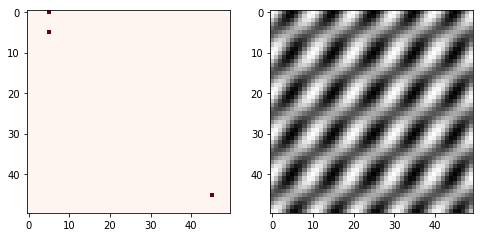

In [2]:
from scipy.fftpack import ifftn

N = 50
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[5, 5] = 1
xf[-5, N-5] = 1
Z = ifftn(xf)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
axs[0].imshow(xf, cmap='Reds')
axs[1].imshow(np.real(Z), cmap='gray')
plt.show()

## Toy example on page 8

In [16]:
y = np.zeros(15)
y[[4, 6, 7, 8]] = [0.5, 1.0, 0.5, 1.0]

miss = y == 0

a = np.zeros(5)
#a[[0, 1, 2]] = [1, -0.1, -0.5]
a[0] = 1

<Container object of 3 artists>

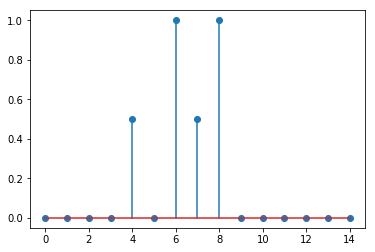

In [17]:
plt.stem(y)

<Container object of 3 artists>

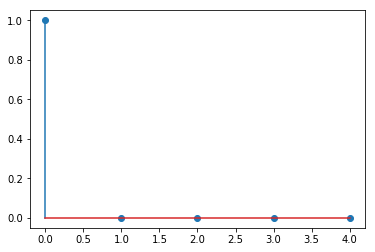

In [18]:
plt.stem(a)

In [19]:
y_est = y.copy()
r = np.zeros_like(y)
da = np.zeros_like(a)
ntau = a.size
epsilonA = 0.01
epsilonY = 0.01
epochs = 64

for e in range(epochs):
    for t in range(y.size):
        for tau in range(0, ntau):
            r[t] += a[tau] * y[t - tau]   # forward
        for tau in range(1, ntau):  # skip the first sample
            a[tau] -= epsilonA * r[t] * y[t - tau]  # adjoint
        for tau in range(0, ntau):
            if miss[t - tau]:
                y_est[t - tau] -= epsilonY * r[t] * a[tau]  # update


<Container object of 3 artists>

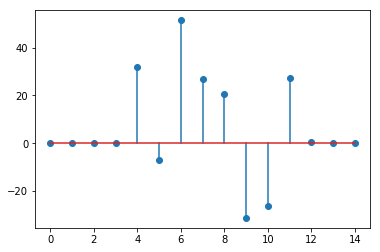

In [20]:
plt.stem(r)

<Container object of 3 artists>

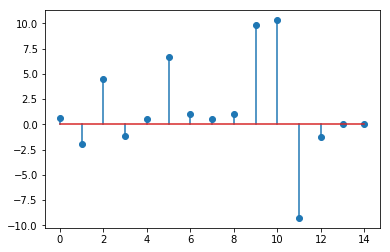

In [21]:
plt.stem(y_est)

<Container object of 3 artists>

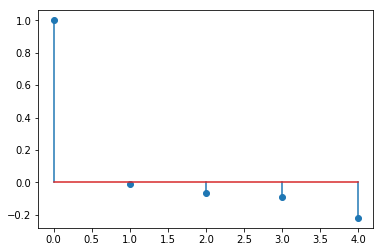

In [23]:
plt.stem(a)